In [21]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_excel('../../pm-data/export-jsps001-1d.xlsx')

# ตั้ง 'timestamp' เป็น index 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
df = df.asfreq('D')  # 'D' สำหรับรายวัน

In [29]:
df.drop(columns=(['timezone', 'pm_2_5_sp', 'Unnamed: 0']), inplace=True)

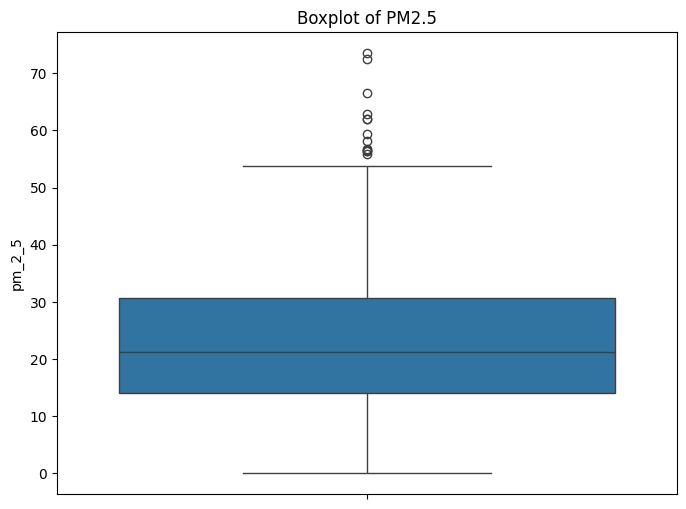

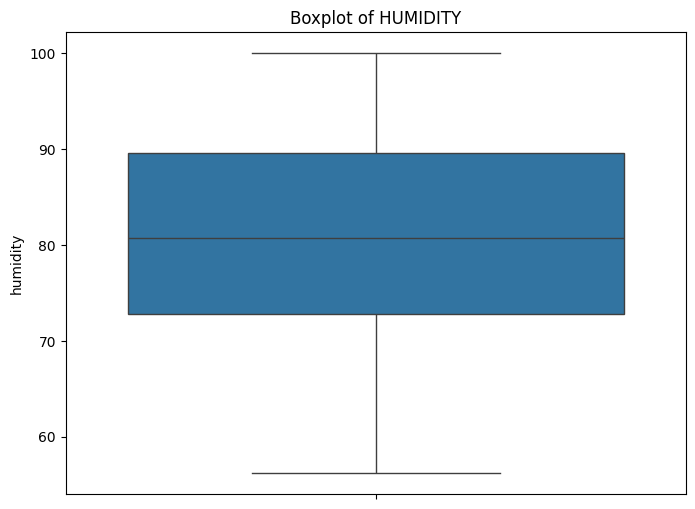

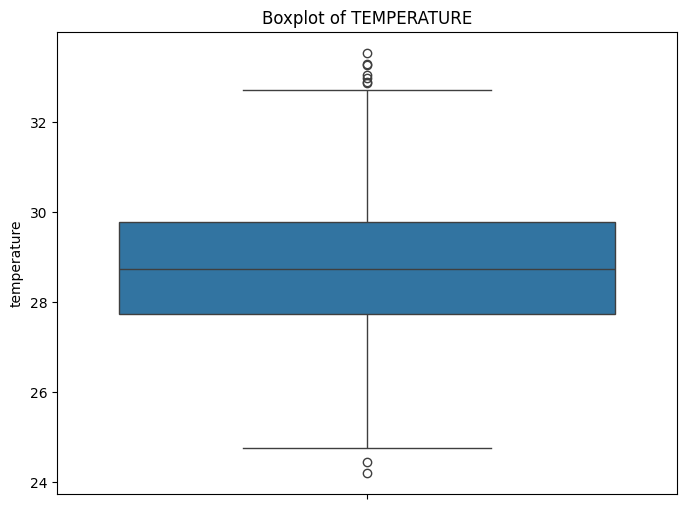

In [32]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of HUMIDITY")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of TEMPERATURE")
plt.show()

In [34]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["pm_2_5"] < lower_bound) | (df["pm_2_5"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_pm = outliers["pm_2_5"].min()
max_outlier_pm = outliers["pm_2_5"].max()

#---------------

# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["temperature"].quantile(0.25)
Q3 = df["temperature"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["temperature"] < lower_bound) | (df["temperature"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_t = outliers["temperature"].min()
max_outlier_t = outliers["temperature"].max()

#----------------

# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["humidity"].quantile(0.25)
Q3 = df["humidity"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["humidity"] < lower_bound) | (df["humidity"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_h = outliers["humidity"].min()
max_outlier_h = outliers["humidity"].max()

#-----------------

print("-"*30,"PM 2.5","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_pm}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_pm}")

print("-"*30,"Temperature","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_t}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_t}")

print("-"*30,"Humidity","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_h}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_h}")

------------------------------ PM 2.5 ------------------------------
ค่าต่ำสุดที่เป็น outlier: 55.94265734265734
ค่ามากสุดที่เป็น outlier: 73.52762854950115
------------------------------ Temperature ------------------------------
ค่าต่ำสุดที่เป็น outlier: 24.20290155589149
ค่ามากสุดที่เป็น outlier: 33.52586884457097
------------------------------ Humidity ------------------------------
ค่าต่ำสุดที่เป็น outlier: nan
ค่ามากสุดที่เป็น outlier: nan
